In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
Mercedes_df= pd.read_csv('Mercedes.csv')
Mercedes_df
import warnings
warnings.filterwarnings('ignore')


In [85]:
# Missing values technique
missing_value_percentage_df=pd.DataFrame({'Column_Name':Mercedes_df.columns,
                               'Missing_Values_Count':Mercedes_df.isnull().sum(),
                               'Missing_Values_Percentage':Mercedes_df.isnull().sum()/Mercedes_df.shape[0]*100})


missing_value_percentage_df=missing_value_percentage_df.sort_values(by='Missing_Values_Percentage',ascending=True)
missing_value_percentage_df


,Column_Name,Missing_Values_Count,Missing_Values_Percentage
ID,ID,0,0.0
X262,X262,0,0.0
X261,X261,0,0.0
X260,X260,0,0.0
X259,X259,0,0.0
...,...,...,...
X125,X125,0,0.0
X124,X124,0,0.0
X123,X123,0,0.0
X132,X132,0,0.0


In [86]:
Mercedes_df= pd.read_csv('Mercedes.csv')
y=Mercedes_df['y']
Mercedes_df.drop(columns='y',inplace=True)
Mercedes_df

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,6,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,7,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,9,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,13,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,ak,s,as,c,d,aa,d,q,0,...,1,0,0,0,0,0,0,0,0,0
4205,8406,j,o,t,d,d,aa,h,h,0,...,0,1,0,0,0,0,0,0,0,0
4206,8412,ak,v,r,a,d,aa,g,e,0,...,0,0,1,0,0,0,0,0,0,0
4207,8415,al,r,e,f,d,aa,l,u,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
cols_to_drop=[]

cols_with_missing_values_grt_50=list(missing_value_percentage_df[missing_value_percentage_df['Missing_Values_Percentage']>50].index)

for col in Mercedes_df.columns:
    if Mercedes_df[col].nunique()== Mercedes_df.shape[0] or Mercedes_df[col].nunique()==1:
        cols_to_drop.append(col)

columns_to_drop=cols_to_drop+cols_with_missing_values_grt_50

Mercedes_df.drop(columns=columns_to_drop,inplace=True)
Mercedes_df.shape

(4209, 364)

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Mercedes_df,y,test_size=0.3,random_state=43)

#filling missing values

for col in x_train.columns:
    if x_train[col].dtype=='object':
        x_train[col]=x_train[col].fillna(x_train[col].mode()[0]).astype(object)
        x_test[col]=x_test[col].fillna(x_train[col].mode()[0]).astype(object)
        
    else:
        x_train[col]=x_train[col].fillna(x_train[col].mean())
        x_test[col]=x_test[col].fillna(x_train[col].mean())
x_train.dtypes

X0      object
X1      object
X2      object
X3      object
X4      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 364, dtype: object

In [89]:
for col in Mercedes_df:
    Mercedes_df[col]= Mercedes_df[col].astype('object')
Mercedes_df.dtypes

X0      object
X1      object
X2      object
X3      object
X4      object
         ...  
X380    object
X382    object
X383    object
X384    object
X385    object
Length: 364, dtype: object

In [90]:
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [91]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le=LabelEncoderExt()

for col in x_train.columns:
    if x_train[col].dtype=='object':
        le.fit(x_train[col])
        x_train[col]=le.transform(x_train[col])
        x_test[col]=le.transform(x_test[col])
x_train

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1280,35,1,9,6,3,3,7,4,0,0,...,0,0,0,0,0,0,0,0,0,0
793,28,14,4,6,3,6,9,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1642,40,4,4,1,3,4,10,13,0,0,...,0,0,1,0,0,0,0,0,0,0
3978,11,1,40,6,3,25,8,17,0,0,...,0,0,0,0,0,0,0,0,0,0
1905,31,4,16,3,3,8,12,6,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,13,24,10,2,3,13,10,21,0,0,...,1,0,0,0,0,0,0,0,0,0
2064,13,14,38,3,3,16,4,14,0,0,...,0,0,0,0,0,0,0,0,0,0
2325,9,24,37,3,3,15,4,5,0,1,...,0,0,1,0,0,0,0,0,0,0
2303,18,24,9,3,3,15,9,25,0,1,...,1,0,0,0,0,0,0,0,0,0


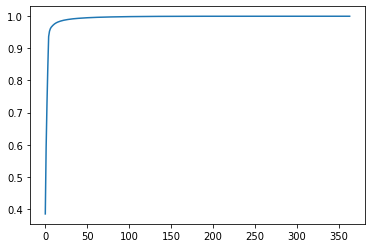

In [92]:
from sklearn.decomposition import PCA

pca = PCA()

x_train_pca_df=pd.DataFrame(pca.fit_transform(x_train))

x_train_pca_df

pca.explained_variance_ratio_

plt.plot(np.cumsum(pca.explained_variance_ratio_))

#plt.xlable()

In [93]:
pca_1=PCA(n_components=50)
x_train_pca_df=pd.DataFrame(pca_1.fit_transform(x_train),columns=list(range(0,50)))
x_test_pca_df=pd.DataFrame(pca_1.transform(x_test))
x_train_pca_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-8.992918,-6.415499,-13.090951,6.490323,-8.402477,1.148071,-3.317930,1.081326,-0.056601,-0.640631,...,-0.358985,0.391668,0.001356,-0.079503,-0.790529,0.012244,-0.341757,-0.083096,-0.089376,-0.322313
1,0.010711,-12.560818,-2.176750,7.119770,-12.270433,-1.497864,-1.773962,1.951579,-1.359794,0.076516,...,0.009801,-0.010243,-0.039889,-0.227353,0.270378,-0.373265,0.143349,0.077437,-0.143330,-0.206353
2,-14.417847,-10.772175,-8.020696,7.548416,-0.556096,-2.079594,3.783969,0.956454,0.196572,-0.919837,...,0.542812,0.171071,-0.086640,0.000612,0.138686,0.364913,-0.097899,-0.191969,0.240510,-0.075951
3,19.337170,16.957308,-11.010379,-16.150718,9.427183,0.542482,-4.015087,1.703101,0.067309,-0.753850,...,-0.163039,-0.318373,0.006158,-0.440133,0.313681,0.409401,0.104162,0.171080,0.352716,0.281499
4,-3.248148,-0.483487,-10.206875,2.117789,-5.648465,-4.018507,1.246331,-1.301905,0.229512,-0.361335,...,-0.041196,0.066626,0.211728,0.425725,0.514212,0.343039,-0.093901,-0.215059,0.178323,-0.107882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,17.434809,-11.475678,7.636850,3.645526,6.662979,-2.896261,2.881011,1.119493,-0.879816,2.567962,...,-0.043552,-0.060584,0.779586,0.233275,-0.495716,0.270975,-0.840713,0.226502,0.008836,-0.599611
2942,20.800282,16.108734,-2.149088,-3.768181,4.097215,4.024658,0.886114,1.625471,-1.538022,5.150175,...,0.143209,-0.085231,0.047257,-0.163160,-0.030139,-0.000969,0.000779,0.078859,-0.106551,0.147340
2943,27.175394,15.062999,4.538708,-0.805213,-6.202816,3.673471,1.770822,-0.133327,0.371031,-1.275828,...,-0.018489,0.290506,0.131035,0.402274,0.043341,0.188179,-0.011590,-0.042492,0.044776,-0.049184
2944,12.416357,-11.981517,10.212891,2.546944,10.282042,-1.621615,1.470592,0.329822,-0.557429,-0.880470,...,0.498948,-0.611395,0.497431,-0.601525,0.611026,-0.103553,-0.221198,-0.083227,0.397246,-0.021081


In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['Column Name']=x_train.columns
vif

,VIF Factor,Column Name
0,2.783299,X0
1,6.680951,X1
2,20.659117,X2
3,2.943191,X3
4,1.051234,X4
...,...,...
359,inf,X380
360,inf,X382
361,1.581976,X383
362,1.838050,X384


In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_pca= pd.DataFrame()
vif_pca["VIF Factor_PCA"]=[variance_inflation_factor(x_train_pca_df.values, i) for i in range(x_train_pca_df.shape[1])]

vif_pca['Column Name']= x_train_pca_df.columns

vif_pca

,VIF Factor_PCA,Column Name
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8
9,1.0,9


In [110]:
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import confusion_matrix

linearreg = LinearRegression()

linearreg.fit(x_train_pca_df,y_train)
y_pred = linearreg.predict(x_test_pca_df)
y_pred

new_df=pd.DataFrame({'Actuals':y_test,
                    'Predictions':y_pred})
new_df

#comp_df = pd.DataFrame({'Actual_values': Y_test_pca_df,'Predicted':y_pred_pca_df})
#comp_df

,Actuals,Predictions
1111,94.55,91.768776
2998,99.64,95.935621
818,89.60,95.802522
3300,87.05,90.181238
294,76.59,78.393921
...,...,...
4030,103.85,107.831223
1634,109.71,93.425545
2957,120.38,115.043390
1526,87.85,93.019087
